In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

# Simple Linear Regression on Delivery Data

In [2]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\assign 4\delivery_time.csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

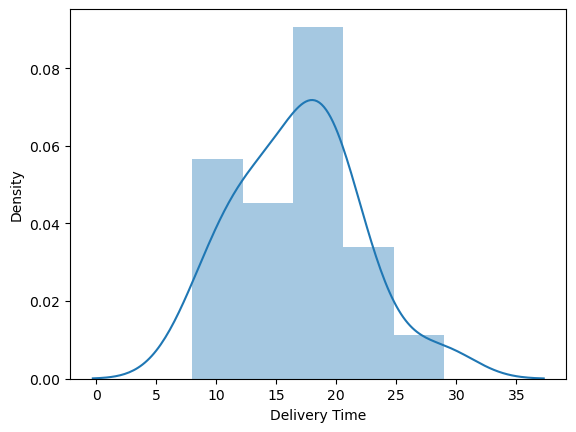

In [9]:
sns.distplot(data['Delivery Time'])


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

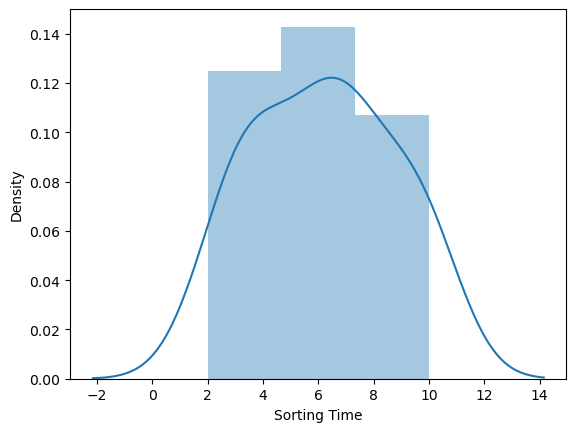

In [8]:
sns.distplot(data['Sorting Time'])

In [21]:
#rename 
data.rename(columns={'Delivery Time':'delivery_time'}, inplace= True)
data.rename(columns={'Sorting Time':'sorting_time'},inplace= True)


In [22]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [23]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

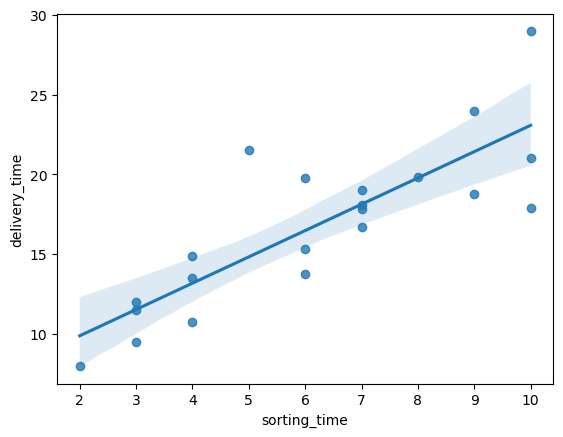

In [27]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

<AxesSubplot:>

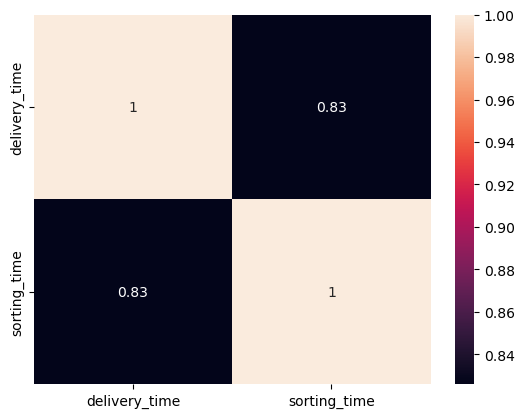

In [31]:
sns.heatmap(data.corr(), annot = True)

In [32]:
df_md = smf.ols('delivery_time~sorting_time', data = data).fit()

In [34]:
df_md.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [35]:
# print values for t value and p value
print(f"t value is \n{df_md.tvalues}\np value is \n{df_md.pvalues}")


t value is 
Intercept       3.823349
sorting_time    6.387447
dtype: float64
p value is 
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [36]:
# r2 value
df_md.rsquared

0.6822714748417231

In [38]:
df_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        20:43:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
data.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

In [43]:
df_md.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

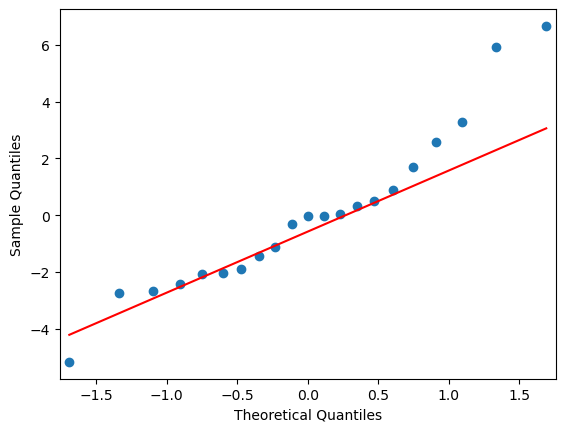

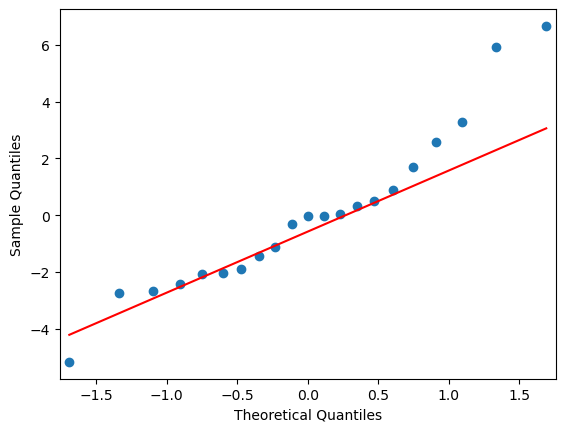

In [46]:
import statsmodels.api as sm
#Q-Q PLOT
sm.qqplot(df_md.resid, line = 'q')

In [47]:
np.where(df_md.resid>6)

(array([20], dtype=int64),)

In [56]:
def get_standardize_values( vals): 
     return (vals - vals.mean())/vals.std()
    # get standardized values

Text(0, 0.5, 'Standardize Residual values')

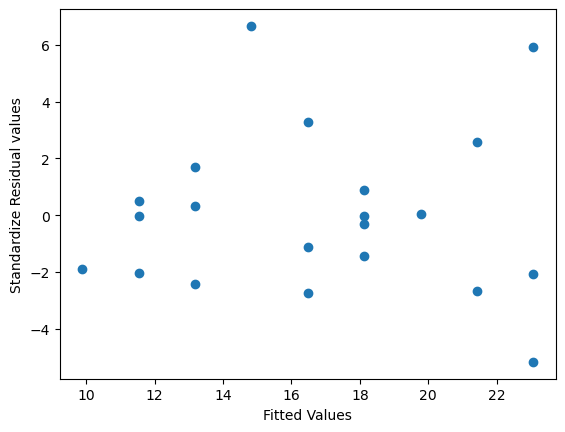

In [58]:
mp.scatter(df_md.fittedvalues,df_md.resid)
mp.xlabel('Fitted Values')
mp.ylabel('Standardize Residual values')

eval_env: 1


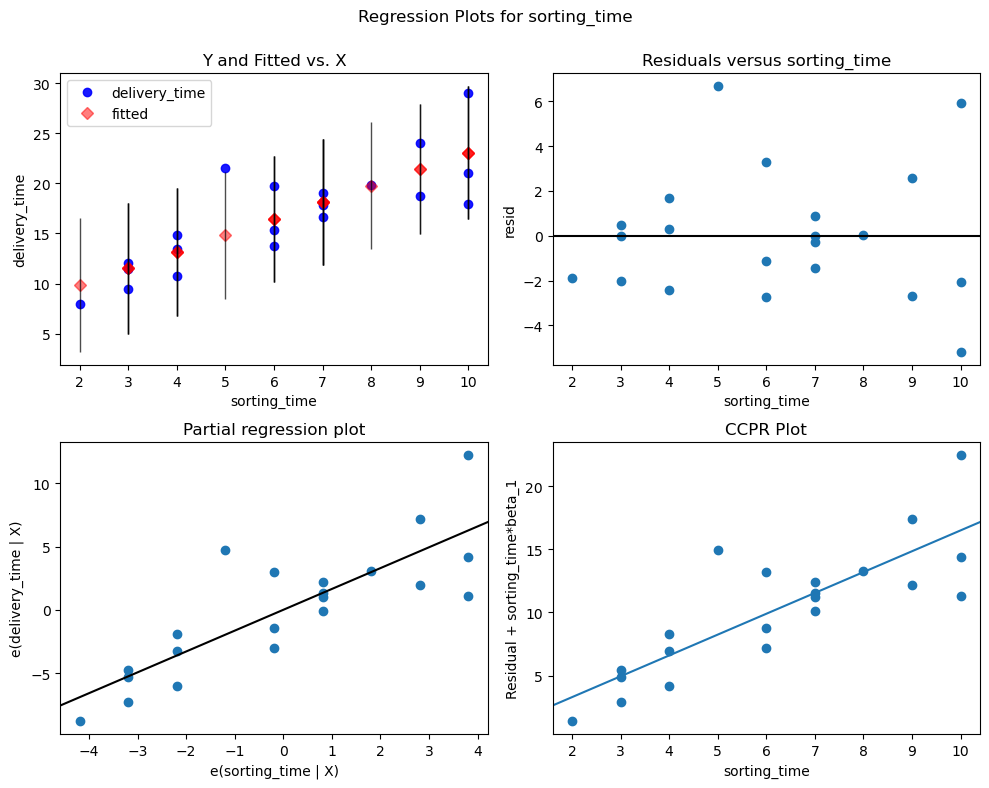

In [63]:
fig = mp.figure(figsize=(10,8));
sm.graphics.plot_regress_exog(df_md,'sorting_time',fig = fig);

In [65]:
# Model Deletion by Cook's Distance and Leverage value
m_i = df_md.get_influence()
(c,_) = m_i.cooks_distance

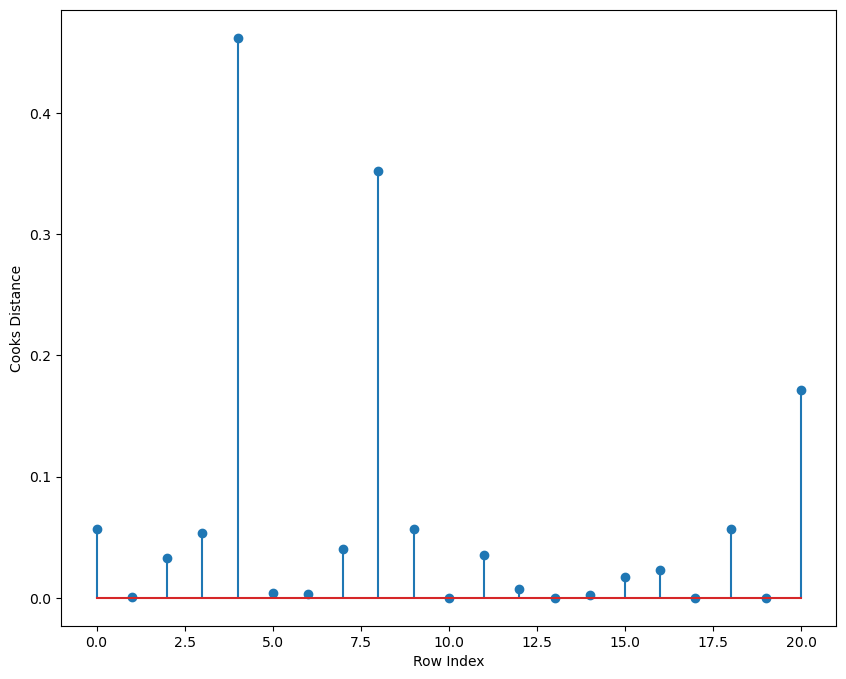

In [69]:
fig = mp.subplots(figsize = (10,8))
mp.stem(np.arange(len(data)), np.round(c,3))
mp.xlabel('Row Index')
mp.ylabel('Cooks Distance')
mp.show()

In [70]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(4, 0.4620530412650319)

In [71]:
len(data)

21

In [72]:
data.iloc[[4]]

,delivery_time,sorting_time
4,29.0,10


In [73]:
#calculate cutoff
k = len(data.columns)
n = len(data)
c_o = 3*(k+1)/n
c_o

0.42857142857142855

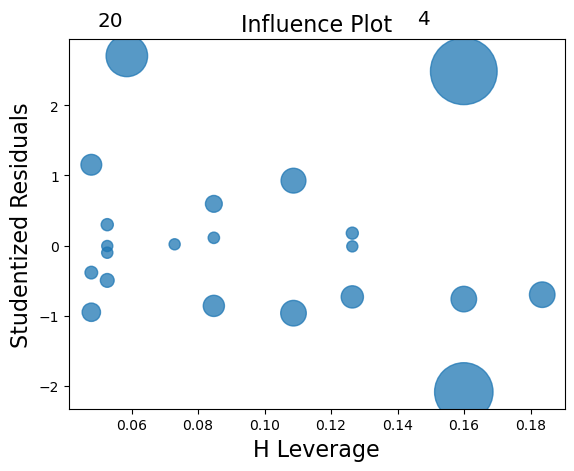

In [80]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(df_md);

In [81]:
# predict delivery time for sorting time = 5,10
nd = pd.Series([5,10])
df = pd.DataFrame(nd, columns= ['sorting_time'])
df

,sorting_time
0,5
1,10


In [82]:
df_md.predict(df)

0    14.827833
1    23.072933
dtype: float64